# Ejercicios para practicar LECTURA Y ESCRITURA DE FICHEROS
Descarga el archivo comprimido que se adjunta con la tarea. Debes descomprimirlo en una carpeta conocida. Este archivo contiene 35 CSVs con los datos de mercado de cada una de las empresas del IBEX 35, el índice bursatil de España.  

**1.**-  Debes escribir un programa que consiga los siguientes objetivos:

1. Lista los archivos con extensión .CSV del directorio donde has descomprimido los 35 archivos e importa los mismos mediante un bucle. Te sugiero que hagas una lista o algún tipo de elemento iterable con todos los dataframes. 
2. Muestra en una gráfica los valores medios diários de cada uno de las empresas (columna 'average') de los meses de octubre, noviembre y diciembre de 2019. Sugerencias:
    - Para filtrar por fecha puedes usar el método loc() del DataFrame. Para crear la fecha de referencia puedes usar el paquete datetime (import datetime as dt) y crearla así "fecha_limite = dt.datetime(2019, 10, 1)". Para transformar todos los strings de fecha de los DataFrames en objetos de tipo datetime puedes usar la siguiente función: "pd.to_datetime(df['Date'],dayfirst=True)".
    - Para hacer la gráfica puedes usar el paquete matplotlib. 
3. Crea un dataframe con las siguientes columnas:
    - Código que identifica a cada empresa.
    - Porcentaje de variación de su valor en la última semana ((ValorFinal-ValorInicial)*100/ValorInicial).
    - Porcentaje de variación de su valor en el último mes.
    - Porcentaje de variación de su valor en el último trimestre.
4. Crea una función que reciba una fecha, importe los datasets de los valores de bolsa y te devuelva el código de empresa que ha subido más en la última semana (en porcentaje).

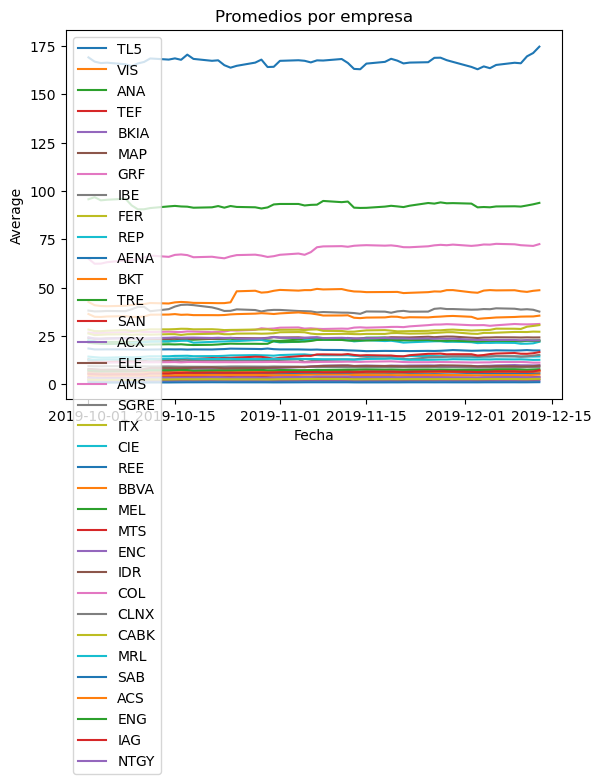

the best average is from the IAG factory between 2019-12-08 00:00:00 and 2019-12-15 00:00:00
the best average is from the CLNX factory between 2019-10-03 00:00:00 and 2019-10-10 00:00:00


/tmp/ipykernel_4470/4021036346.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFilteredByDate.sort_values(by=['Date'], inplace=True)
/tmp/ipykernel_4470/4021036346.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFilteredByDate.sort_values(by=['Date'], inplace=True)
/tmp/ipykernel_4470/4021036346.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFilteredByDate.sort_values(by=['Date'], inplace=True)
/tmp/ipykernel_4470

In [53]:
import os
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta

fileDataFrames = []
initDate = dt.datetime(2019,10,1)
limitDate = dt.datetime(2020,1,1)
todayDate = dt.datetime(2019,12,15)
lastWeekDate = (todayDate - relativedelta(days=7))
lastMonthDate = (todayDate - relativedelta(days=30))
lastThreeMonthDate = (todayDate - relativedelta(days=90))
fig, ax = plt.subplots()
legend = []
codList = []
lastWeekVariationList = []
lastMonthVariationList = []
lastThreeMonthVariationList = []
bestAverageCod  =  ''

fileList = os.listdir('./IBEX35_Individual_data')
for file in fileList:
    if file.endswith('.csv'):
        fileDataFrames.append(pd.read_csv('./IBEX35_Individual_data/' + file))

#2
for fileDataFrame in fileDataFrames:
    dfByDateRange = fileDataFrame.loc[pd.to_datetime(fileDataFrame['Date'], dayfirst=True)
                      .between(initDate, limitDate)]
    legend.append(dfByDateRange['Ticker'].values[0])
    ax.plot(pd.to_datetime(dfByDateRange['Date'], dayfirst=True), dfByDateRange['Average'])


ax.set_title("Promedios por empresa")
ax.set_xlabel("Fecha")
ax.set_ylabel("Average")

plt.legend(legend)
plt.show()

#3 no me devuelve bien el dataframe
def addValuesByFilter(date, list):
    for fileDataFrame in fileDataFrames:        
        dfFilteredByDate = fileDataFrame.loc[pd.to_datetime(fileDataFrame['Date'], dayfirst=True)
                      .between(pd.to_datetime(date, dayfirst=True), pd.to_datetime(todayDate, dayfirst=True))]
        dfFilteredByDate.sort_values(by=['Date'], inplace=True)
        if(len(codList) == len(list)):
            codList.append(dfFilteredByDate["Ticker"].values[0])

        list.append(((dfFilteredByDate["Average"].values[-1] - dfFilteredByDate["Average"].values[0]) 
                        / dfFilteredByDate["Average"].values[0]) * 100)

addValuesByFilter(lastWeekDate, lastWeekVariationList)
addValuesByFilter(lastMonthDate, lastMonthVariationList)
addValuesByFilter(lastThreeMonthDate, lastThreeMonthVariationList)

factoryDf = pd.DataFrame({'cod': codList, 
            'lastWeekVariation': lastWeekVariationList,
            'lastMonthVariation': lastMonthVariationList,
            'lastThreeMonthVariation' : lastThreeMonthVariationList})

factoryDf.head(20)

def showBestAverageByDate(date):
    bestFactoryAverage = - 100
    dateMinusWeek = date - relativedelta(days=7)
    for fileDataFrame in fileDataFrames:        
        dfFilteredByDateMinusWeek = fileDataFrame.loc[pd.to_datetime(fileDataFrame['Date'], dayfirst=True)
                      .between(pd.to_datetime(dateMinusWeek, dayfirst=True), pd.to_datetime(date, dayfirst=True))]
        dfFilteredByDateMinusWeek.sort_values(by=['Date'], inplace=True)
        FactoryAverage = (((dfFilteredByDateMinusWeek["Average"].values[-1] - dfFilteredByDateMinusWeek["Average"].values[0]) 
                        / dfFilteredByDateMinusWeek["Average"].values[0]) * 100)
        if(FactoryAverage > bestFactoryAverage):
            bestFactoryAverage = FactoryAverage
            bestAverageCod = dfFilteredByDateMinusWeek["Ticker"].values[0]

    return "the best average is from the " + bestAverageCod + " factory between " + str(dateMinusWeek) + " and " + str(date)
        
print(showBestAverageByDate(todayDate)) 
print(showBestAverageByDate(dt.datetime(2019,10,10))) 